In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [62]:
train=pd.read_csv(r"C:\Users\USER\Desktop\캐글 모델링\boston house\data\train.csv", index_col='Id')
test=pd.read_csv(r"C:\Users\USER\Desktop\캐글 모델링\boston house\data\test.csv", index_col='Id')

# 프로파일 및 eda 목적용 데이터 프레임
data=pd.concat([train, test], sort=False)

# data description에 안나와있는 특성 삭제
data.drop(columns=['KitchenAbvGr'], inplace=True)
data.drop(columns=['BedroomAbvGr'], inplace=True)

연속형 변수에 대해서 왜도 검사

In [63]:
numeric_con=['LotFrontage', 'TotalBsmtSF', '1stFlrSF', 'BsmtUnfSF', 'GrLivArea', 'LotArea', 'EnclosedPorch', 'OpenPorchSF', 'BsmtFinSF2', 'WoodDeckSF', 'MasVnrArea', 'GarageArea', '2ndFlrSF', 'BsmtFinSF1', 'PoolArea', '3SsnPorch', 'LowQualFinSF', 'MiscVal', 'ScreenPorch']


In [64]:
target=train['SalePrice']

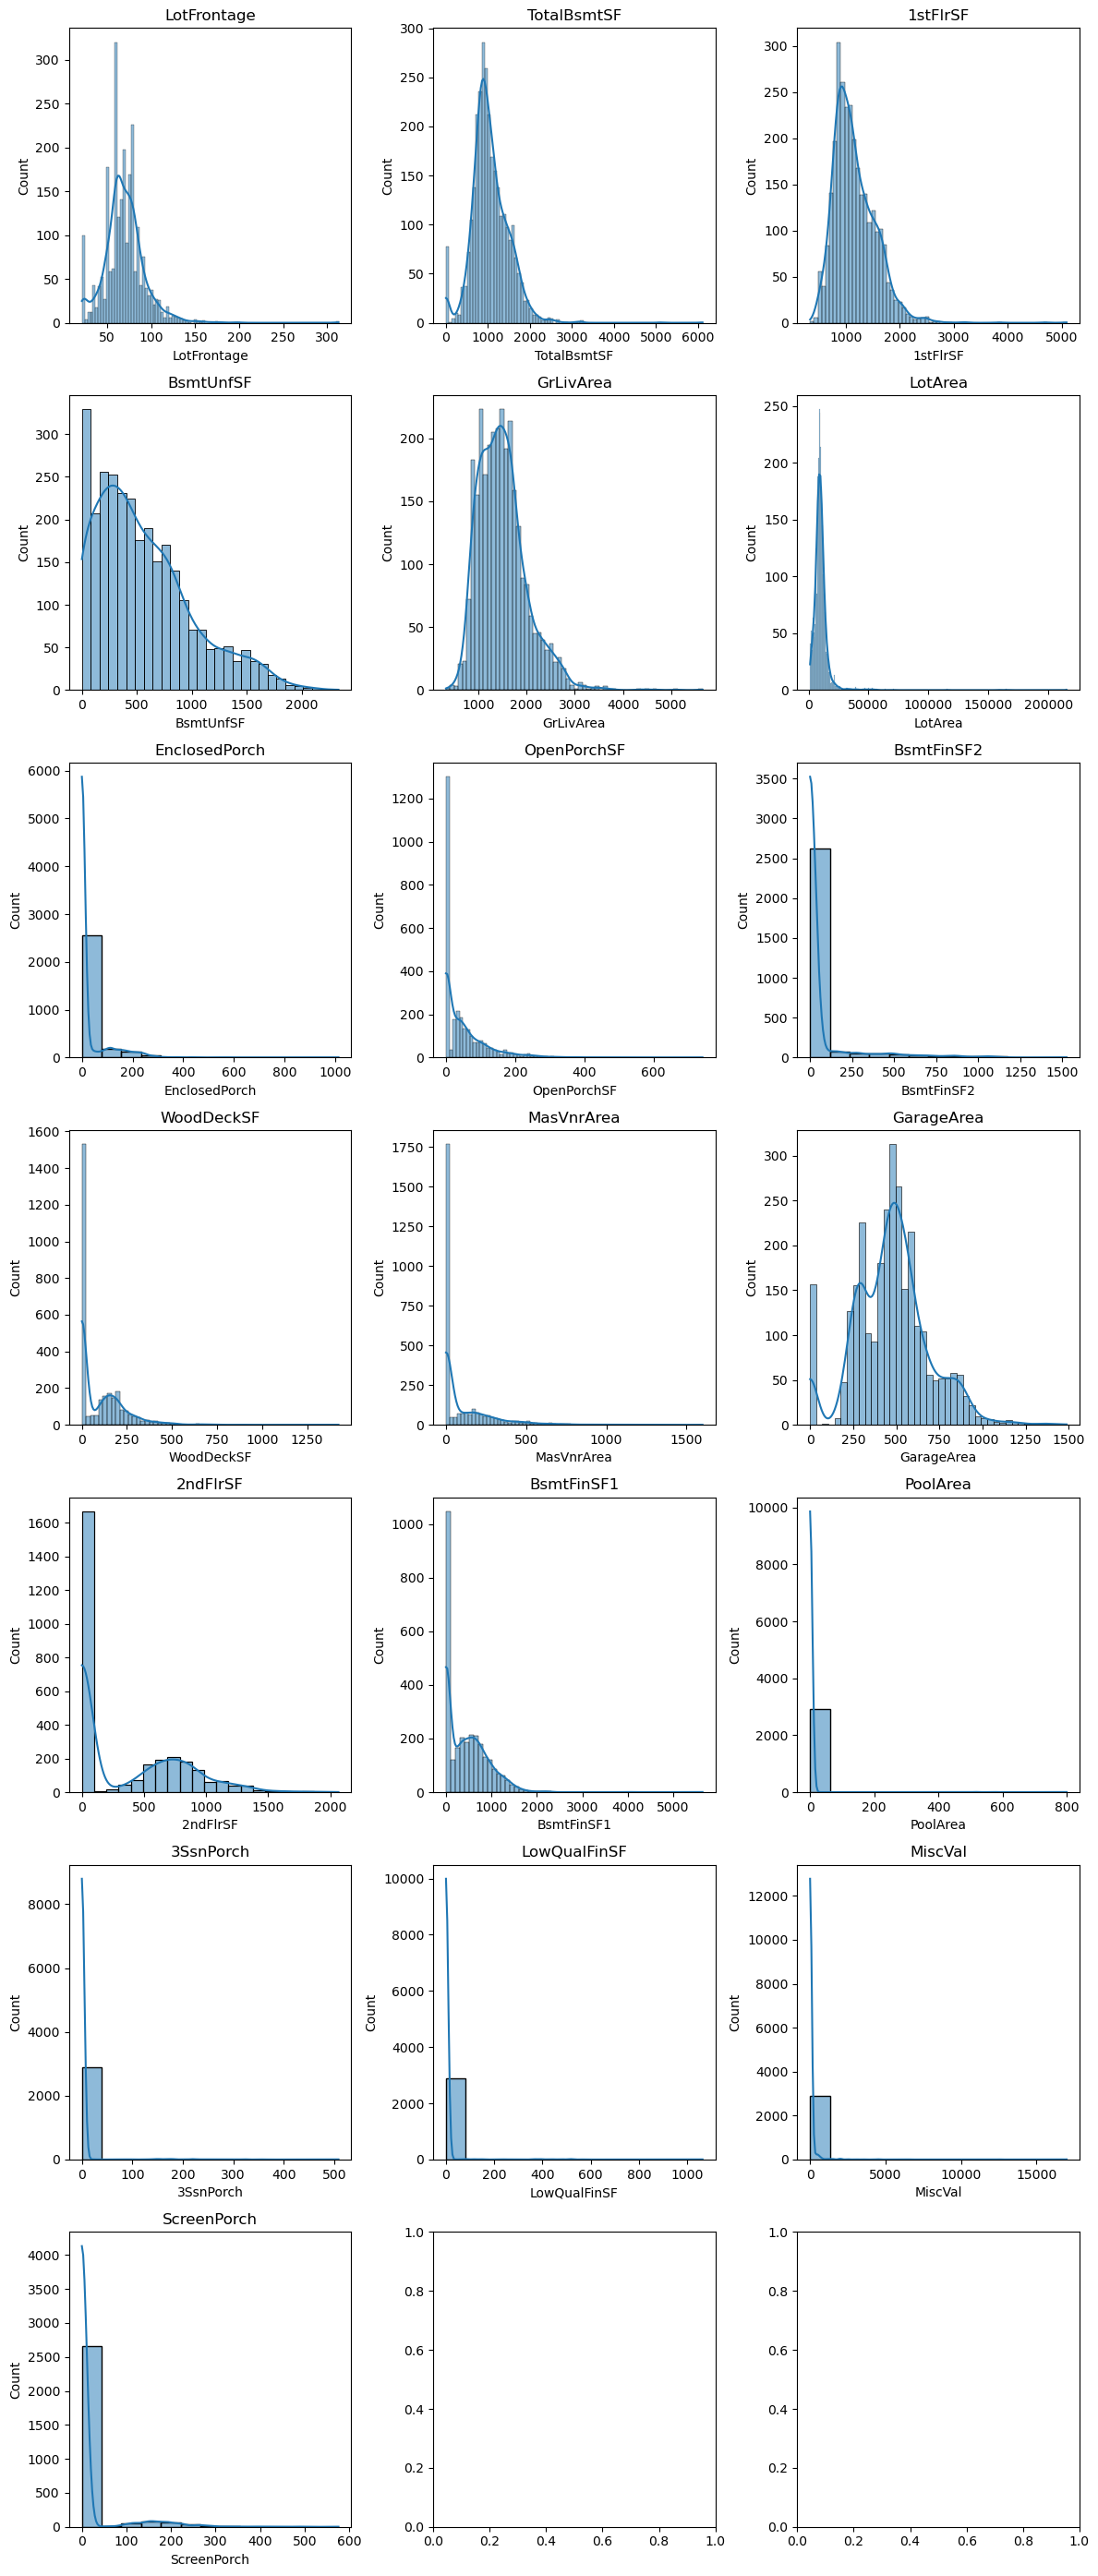

In [65]:
num = len(numeric_con)
col = 3
row = (num + col - 1) // col

fig, axs = plt.subplots(row, col, figsize=(col * 4, row * 4))

for r in range(row):
    for c in range(col):
        i = r * col + c
        if i < num:
            ax = axs[r, c]
            sns.histplot(data[numeric_con[i]], kde=True, ax=ax)  # kde=True 설정
            ax.set_title(numeric_con[i])

plt.tight_layout()
plt.show()

In [66]:
from scipy.stats import skew 
skewness = data[numeric_con].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

In [67]:
high_skewness = skewness[abs(skewness) > 0.5]
skew_feat = high_skewness.index

In [68]:
print(high_skewness)
print(list(skew_feat))

MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
BsmtFinSF2        4.145323
EnclosedPorch     4.003891
ScreenPorch       3.946694
MasVnrArea        2.601240
OpenPorchSF       2.535114
WoodDeckSF        1.842433
LotFrontage       1.502351
1stFlrSF          1.469604
BsmtFinSF1        1.424989
GrLivArea         1.269358
TotalBsmtSF       1.162285
BsmtUnfSF         0.919351
2ndFlrSF          0.861675
dtype: float64
['MiscVal', 'PoolArea', 'LotArea', 'LowQualFinSF', '3SsnPorch', 'BsmtFinSF2', 'EnclosedPorch', 'ScreenPorch', 'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', 'LotFrontage', '1stFlrSF', 'BsmtFinSF1', 'GrLivArea', 'TotalBsmtSF', 'BsmtUnfSF', '2ndFlrSF']


In [69]:
from scipy.special import boxcox1p
lam = 0.15
for feat in skew_feat:
    data[feat] = boxcox1p(data[feat], lam)

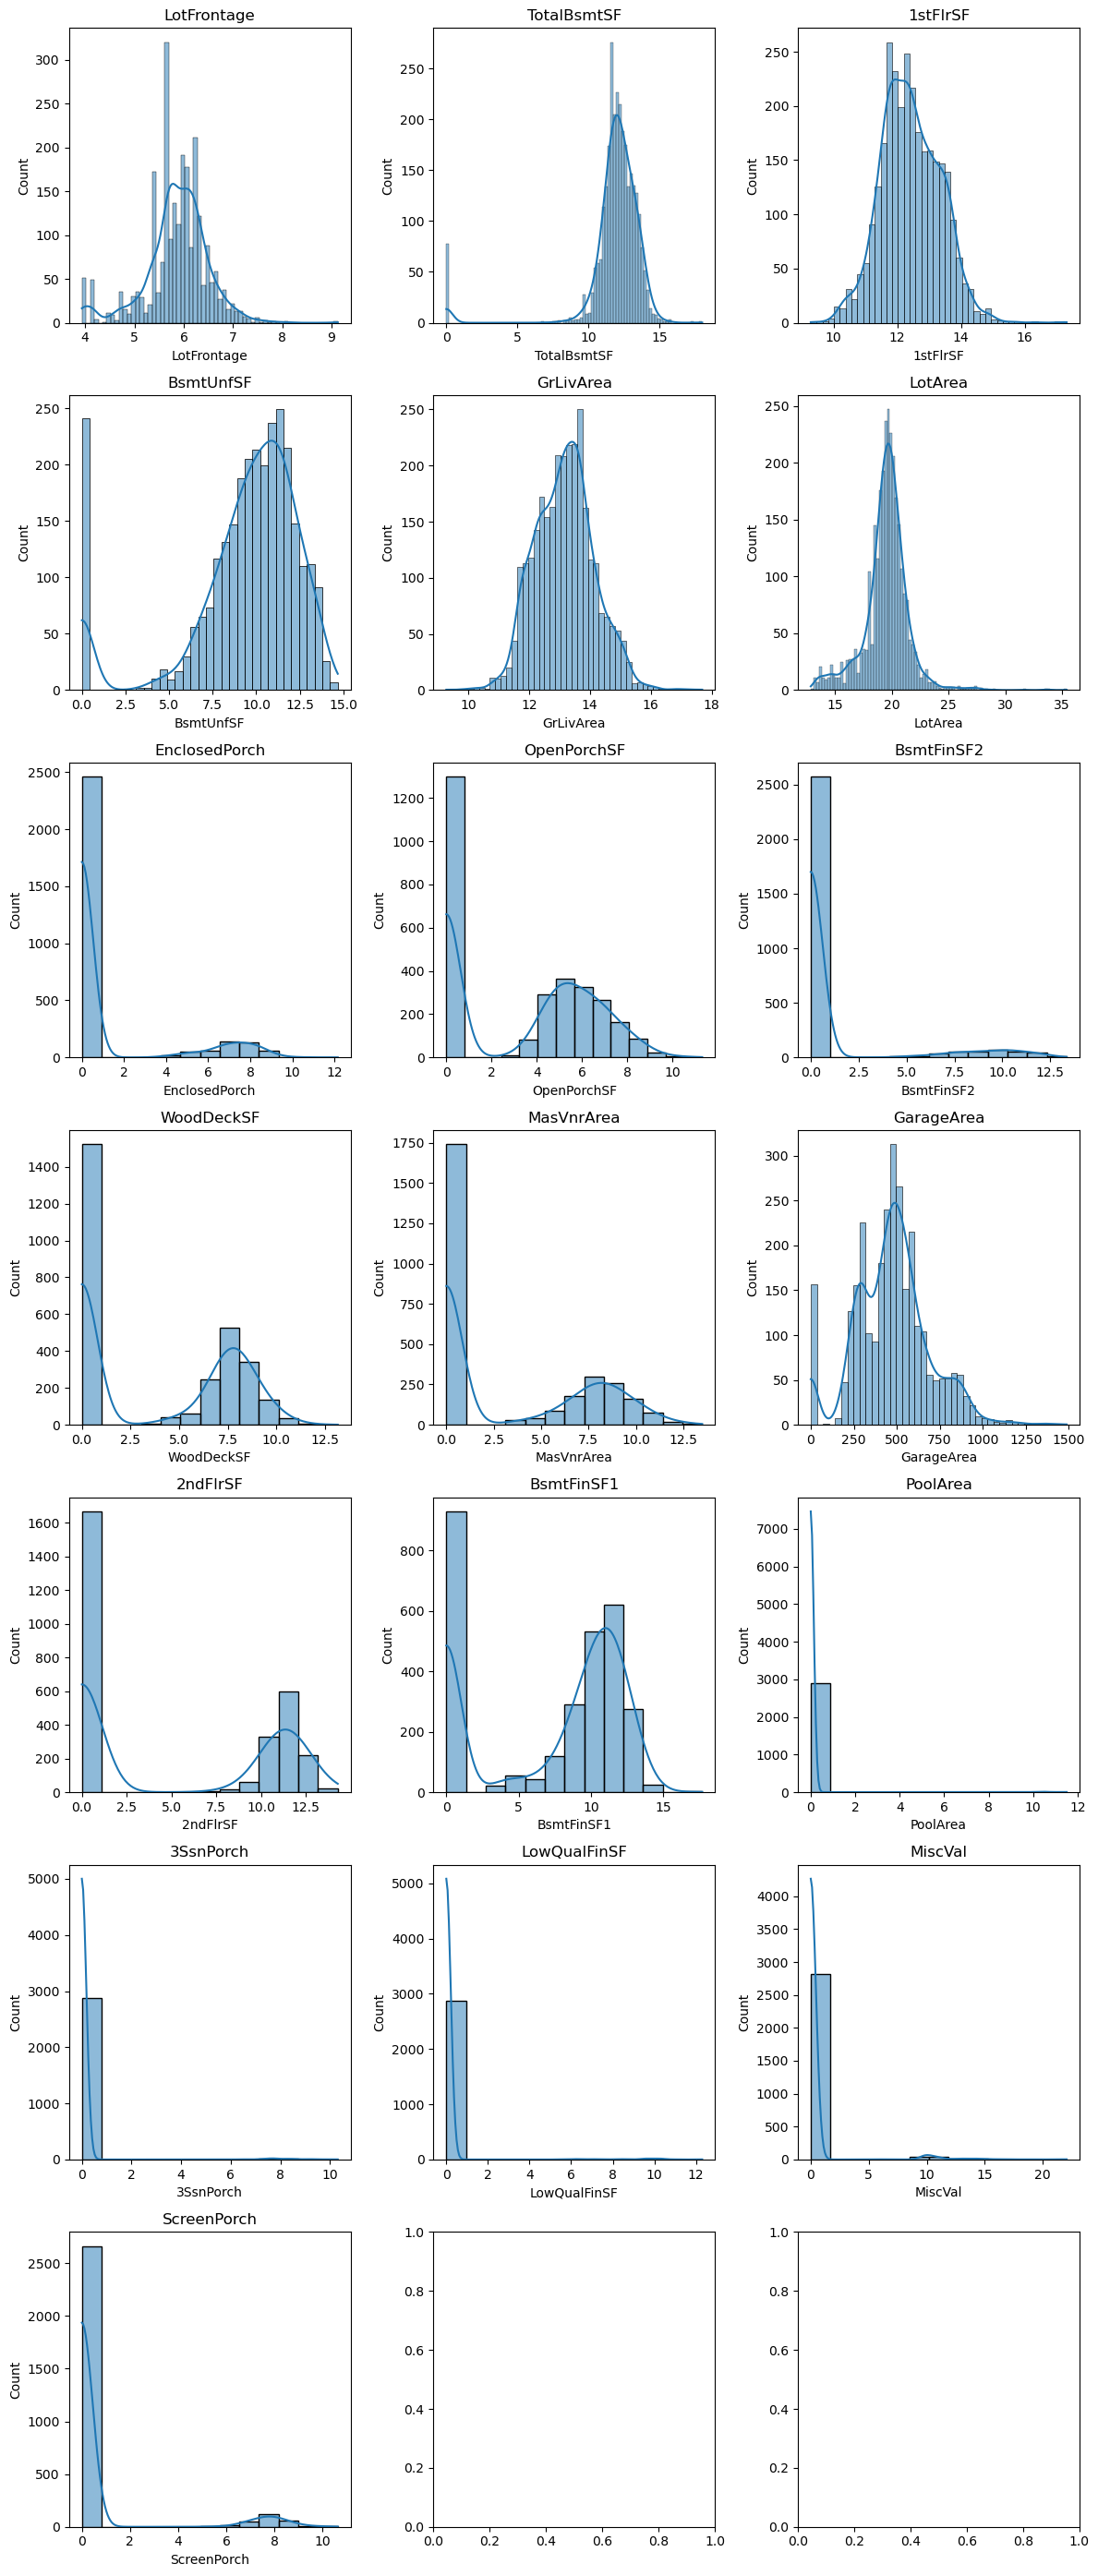

In [70]:
num = len(numeric_con)
col = 3
row = (num + col - 1) // col

fig, axs = plt.subplots(row, col, figsize=(col * 4, row * 4))

for r in range(row):
    for c in range(col):
        i = r * col + c
        if i < num:
            ax = axs[r, c]
            sns.histplot(data[numeric_con[i]], kde=True, ax=ax)  # kde=True 설정
            ax.set_title(numeric_con[i])

plt.tight_layout()
plt.show()

정규화가 필요해보이는 특성은 딱히 없음 <-> 일단 진행

대신 0이 많은 것으로 보아 

0을 따로 특성으로 만드는것이 나아보임

In [71]:
zero_list =['BsmtUnfSF', 'EnclosedPorch', 'OpenPorchSF', 'BsmtFinSF2', 'WoodDeckSF', 'MasVnrArea', '2ndFlrSF', 'BsmtFinSF1', 'PoolArea', '3SsnPorch', 'LowQualFinSF', 'MiscVal', 'ScreenPorch']

In [72]:
for i in zero_list:
    print(i)
    print(sorted(data[i].unique()))

BsmtUnfSF
[0.0, 3.340760310539712, 3.4381104434026533, 3.618222517841817, 4.2014612941903655, 5.210789042972047, 6.469749997220178, 6.533131230124546, 6.986732432057258, 7.440766394665014, 7.885224873775467, 8.036603342806158, 8.168905235578311, 8.243098627365718, 8.375577002227507, 8.737598519334247, 8.77212495572758, 8.823108115244976, 9.125735246126716, 9.243906751287225, 9.25112953344019, 9.26551962831099, 9.286967630227565, 9.315313173253958, 9.603370950137975, 9.75842361648199, 9.934165447113983, 9.94551387609232, 10.023747699744126, 10.029256998621547, 10.110685457791915, 10.14263935689581, 10.256948546565363, 10.297452652874126, 10.307493576715228, 10.337416044520737, 10.415781884252072, 10.501575267176273, 10.557449464533047, 10.566662694791551, 10.585005856057766, 10.6303862264031, 10.657293985259306, 10.666210847537995, 10.670659548820657, 10.683966978663795, 10.775536258885502, 10.79694222899322, 10.805463148214445, 10.83088556721427, 10.938696646743818, 11.046830282882052,

있음 or 없음으로 전부 맵핑

In [74]:
for i in zero_list:
    data[f'{i}orNot'] = np.where(data[i] > 0, 1, 0) # 벽난로 여부
    print(f'{i}orNot')

BsmtUnfSForNot
EnclosedPorchorNot
OpenPorchSForNot
BsmtFinSF2orNot
WoodDeckSForNot
MasVnrAreaorNot
2ndFlrSForNot
BsmtFinSF1orNot
PoolAreaorNot
3SsnPorchorNot
LowQualFinSForNot
MiscValorNot
ScreenPorchorNot
